## Домашнее задание 3

#### Задание 1

Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и Y из этих данных.
Разбейте эти датафреймы н а тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8


In [3]:
X = np.hstack([df.values[::2, :], df.values[1::2, :2]])
y = df.values[1::2, 2]

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

In [6]:
from sklearn.metrics import r2_score
r2_lr = r2_score(y_test, y_hat)
r2_lr

0.71122600574849

#### Задание 2

Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy, так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма. 

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 1000, max_depth = 12, random_state = 42)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
r2_rf = r2_score(y_test, y_hat)
r2_rf

0.87472606157312

Чтобы ответить на вопрос о том, какая модель лучше, сначала проверим, являются ли статистически значимыми наши результаты. Для этого проведем F-test Фишера, нулевая гипотеза которого состоит в том, что между факторами и целевой переменной нет зависимости, а полученный коэффициент детерминации имеет значение, обусловленное статистическим выбросом.

In [8]:
m = X_test.shape[1]
n = X_test.shape[0]
F_statistic_lr = (r2_lr / m) / ((1 - r2_lr) / (n - m - 1))
F_statistic_lr

26.144797487921622

In [9]:
from scipy import stats
alpha = 0.05
k1 = m
k2 = n - m - 1
t = stats.f.ppf(1 - alpha, k1, k2)
t

1.7916927725085028

In [10]:
p_value = 1 - stats.f.cdf(F_statistic_lr,  k1, k2)
p_value

1.1102230246251565e-16

При уровне значимости 0.05 критическая область начинается с значения статистики 1.79. Полученная статистика на основе нашего коэффициента детерминации равна 24.14, что находится далеко в критической области (p_value = 1.1102230246251565e-16). Нулевая гипотеза опровергнута, результаты статистически значимы. Так как коэффициент для Random Forest выше, качество этой модели выше, чем у модели линейной регрессии

#### Задание 3

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

In [11]:
# ?RandomForestRegressor
# нас интересует вот эта часть вывода
"""
feature_importances_ : ndarray of shape (n_features,)
    The impurity-based feature importances.
    The higher, the more important the feature.
    The importance of a feature is computed as the (normalized)
    total reduction of the criterion brought by that feature.  It is also
    known as the Gini importance.

    Warning: impurity-based feature importances can be misleading for
    high cardinality features (many unique values). See
    :func:`sklearn.inspection.permutation_importance` as an alternative.
"""
print()

In [12]:
model.feature_importances_

array([0.03167574, 0.00154252, 0.00713813, 0.00123624, 0.01426897,
       0.40268179, 0.01429864, 0.06397257, 0.00528122, 0.01152493,
       0.01808108, 0.01245085, 0.41584732])

In [13]:
model.feature_importances_.sum()

1.0

In [14]:
np.argsort(model.feature_importances_)[-2:]

array([ 5, 12])

Наибольшее значение имеют признаки 5 и 12, а именно:

RM - average number of rooms per dwelling

LSTAT - % lower status of the population

#### Задание 4
В этом задании мы будем работать с датасетом, с которым мы уже знакомы по домашнему заданию по библиотеке Matplotlib, это датасет Credit Card Fraud Detection.Для этого датасета мы будем решать задачу классификации - будем определять,какие из транзакциции по кредитной карте являются мошенническими. Данный датасет сильно несбалансирован (так как случаи мошенничества относительно редки),так что применение метрики accuracy не принесет пользы и не поможет выбрать лучшую модель.Мы будем вычислять AUC, то есть площадь под кривой ROC.


Импортируйте из соответствующих модулей RandomForestClassifier, GridSearchCV и train_test_split.
Загрузите датасет creditcard.csv и создайте датафрейм df.
С помощью метода value_counts с аргументом normalize=True убедитесь в том, что выборка несбалансирована.Используя метод info, проверьте, все ли столбцы содержат числовые данные и нет ли в них пропусков.Примените следующую настройку, чтобы можно было просматривать все столбцы датафрейма:
pd.options.display.max_columns = 100.
Просмотрите первые 10 строк датафрейма df.


Создайте датафрейм X из датафрейма df, исключив столбец Class.
Создайте объект Series под названием y из столбца Class.
Разбейте X и y на тренировочный и тестовый наборы данных при помощи функции train_test_split, используя аргументы: test_size=0.3, random_state=100, stratify=y.
У вас должны получиться объекты X_train, X_test, y_train и y_test.
Просмотрите информацию о их форме.


Для поиска по сетке параметров задайте такие параметры:
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5),'max_depth': np.arange(4, 7)}]

Создайте модель GridSearchCV со следующими аргументами:
estimator=RandomForestClassifier(random_state=100), param_grid=parameters, scoring='roc_auc', cv=3.

Обучите модель на тренировочном наборе данных (может занять несколько минут).
Просмотрите параметры лучшей модели с помощью атрибута best_params_.
Предскажите вероятности классов с помощью полученнной модели и метода predict_proba.
Из полученного результата (массив Numpy) выберите столбец с индексом 1 (вероятность класса 1) и запишите в массив y_pred_proba. Из модуля sklearn.metrics импортируйте метрику roc_auc_score. Вычислите AUC на тестовых данных и сравните с результатом, полученным на тренировочных данных, используя в качестве аргументов массивы y_test и y_pred_proba.

In [15]:
df = pd.read_csv('creditcard.csv')

In [16]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Датафрейм очень сильно разбалансирован по классам

In [17]:
pd.options.display.max_columns = 100

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Пустых значений нет, все значения числовые

In [19]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [20]:
X = df.iloc[:, :-1]
y = df['Class']
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((199364, 30), (85443, 30), (199364,), (85443,))

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
parameters = [{'n_estimators': [10, 15], 'max_features': np.arange(3, 5),'max_depth': np.arange(4, 7)}]
estimator=RandomForestClassifier(random_state=100)

In [26]:
clf = GridSearchCV(estimator, param_grid=parameters, scoring='roc_auc', cv=3)

In [27]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             param_grid=[{'max_depth': array([4, 5, 6]),
                          'max_features': array([3, 4]),
                          'n_estimators': [10, 15]}],
             scoring='roc_auc')

In [28]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [29]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]

In [30]:
from sklearn.metrics import roc_auc_score

In [31]:
roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

In [32]:
y_pred_proba_train = clf.predict_proba(X_train)[:, 1]

In [33]:
roc_auc_score(y_train, y_pred_proba_train)

0.9703527882554751

На тренировочном датасете roc_auc_score ожидаемо выше, чем на тестовых данных.

### Задание 5

В этом задании мы будем работать с датасетом, из встроенных датасетов sklearn.datasets load_digits. Изучите, что это за датасет, поймите, что это за задача (регрессия или классификация), изобразите первые 10 объектов из данных с помощью matplotlib.

Разбейте датасет на тренировочный и тестовый наборы данных.

Обучите наиболее понравившуюся вам модель машинного обучения и подберите лучшие гиперпараметры.
Посчитайте подходящие метрики качества.

In [34]:
import math
import random

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()

<Figure size 432x288 with 0 Axes>

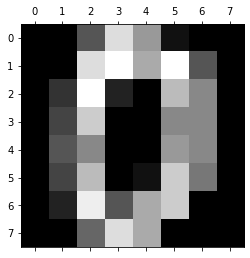

In [36]:
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [37]:
X, Y = digits.data, digits.target
X.shape, Y.shape

((1797, 64), (1797,))

In [38]:
X = np.reshape(X, (1797, 8, 8))
MV = X.mean(axis=0)
Stdev = np.sqrt(np.power(X - MV, 2).mean(axis=0) + 1e-10)
X = (X - MV) / Stdev

In [39]:
X.mean(), X.std()

(-5.313254319296798e-18, 0.9762812065967328)

In [40]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=100, random_state = 42)

Напишем свою нейросетку

In [41]:
class Network_multiclass:
    
    """Same as Network class except for CELoss support
    
    inference_mode() and train_mode() methods were introduces to support BatchNorm layer switch of regimes. 
    
    """
    
    def __init__(self, layers):
        self.layers = layers
        
    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X
    
    def backward(self, upstr_grad, lr = 0.01, debug = 0):
        for layer in reversed(self.layers):
            upstr_grad = layer.backward(upstr_grad, lr = lr, debug = debug)
        return upstr_grad
    
    def predict(self, X):
        Y_hat = self.forward(X).argmax(axis = 1)
        return Y_hat
    
    def inference_mode(self):
        for layer in self.layers:
            if isinstance(layer, BatchNorm):
                layer.inference = True
    
    def train_mode(self):
        for layer in self.layers:
            if isinstance(layer, BatchNorm):
                layer.inference = False

In [42]:
class Linear:
    """Fully Connected Layer. 
    
    
    Initializer's parameters:
    inp -- the number of input neurons
    out -- the number of output neurons
    
    The weights are initialized as in PyTorch.
    
    forward() parameters:
    X -- matix of shape (N, inp), where N is the size of a batch
    
    backward() parameters:
    upstr_grad -- upstream (incoming) gradients from the layer closer to the end of the network
    lr -- learning rate
    debug -- debug level. debug == 2 shows gradients on every learning step.
    """
    
    def __init__(self, inp, out):
        self.inp = inp
        self.out = out
        stdv = 1.0 / np.sqrt(inp)
        self.W = np.random.default_rng().uniform(-stdv, stdv, (inp, out)).astype(np.float32)
        self.X_ = None
        
    def forward(self, X):
        self.X_ = X.astype(np.float32)
        return np.dot(X.astype(np.float32), self.W)
    
    def backward(self, upstr_grad, lr = 0.01, debug = 0): 
        # gradients are averaged by batch size, since if we not do it, the deltas will grow proportionally to batch size
        delta_W = np.dot(np.transpose(self.X_), upstr_grad.astype(np.float32)) / self.X_.shape[0]
        
        self.W += (-1) * lr * delta_W # multiply by -1 to move in the opposite of gradient direction
        if debug == 2: print(f'Linear Layer: W gradients = {delta_W}')
        if debug == 2: print(f'Linear Layer: new weights = {self.W}')
        return np.dot(upstr_grad.astype(np.float32), np.transpose(self.W))

In [43]:
class BatchNorm:
    """ Batch normalization layer (as per https://arxiv.org/pdf/1502.03167.pdf)
    Normalizes, i.e. achieves zero mean and standard deviation of 1 using mini-batch statistics for every pixel along the batch direction.
    
    Attibutes and parameters:
    self.inference - whether the layer is in inference mode
    self.m and self.v - mean and variance of the whole training set calculated as moving average during training
    self.g and self.b - gamma and beta used for scaling and shifting normalized inputs. These parameters are learnable and for each mini-batch
        a gradient step is done, see backward() method.
    self.mu, self.var - mean and variance of a mini-batch. They have the same dimension as input image in a batch as they are calculated per-pixel
    self.momentum - momentum used for moving average calculation
    
    """
    
    
    def __init__(self):
        self.inference = False
        self.g = 1
        self.b = 1
        self.m = 0
        self.v = 0    
        self.mu = None
        self.var = None
        self.X_ = None
        self.X_norm_ = None
        self.momentum = 0.1
        
    def forward(self, X):
        eps = 1e-10
        if not self.inference:
            self.X_ = X
            self.mu = X.mean(axis=0)
            self.var = np.power(X - self.mu, 2).mean(axis = 0)
            
            self.m = (1 - self.momentum) * self.m + self.momentum * self.mu
            self.v = (1 - self.momentum) * self.v + self.momentum * self.var

            X_norm = (X - self.mu) / np.sqrt(self.var + eps)
            self.X_norm_ = X_norm
            return X_norm * self.g + self.b
        
        else:
            return X * self.g / np.sqrt(self.v + eps) + (self.b - self.g * self.m / np.sqrt(self.v + eps))
    
    def backward(self, upstr_grad, lr = 0.01, debug = 0):
        eps = 1e-10
        dldX_norm = upstr_grad * self.g
        
        # remember that self.var is a matrix and self.mu is a matrix, hence dldvar and dldmu are also matrixes.
        # the formulas for gradient calculations are provided in the original paper
        
        dldvar = (dldX_norm * (self.X_ - self.mu) * (-1/2) * np.power(self.var + eps, -3/2)).sum(axis=0)
        dldmu = dldX_norm * (-1) / np.sqrt(self.var + eps).sum(axis=0) + dldvar * 1/self.X_.shape[0] * ((-2) * (self.X_ - self.mu)).sum(axis=0)
        dldX = dldX_norm * 1 / np.sqrt(self.var + eps) + dldvar * 1 / self.X_.shape[0] * 2 * (self.X_ - self.mu) + dldmu * 1 / self.X_.shape[0]
        dldg = (upstr_grad * self.X_norm_).sum(axis=0)
        dldb = upstr_grad.sum(axis=0)
        
        self.g += (-1) * lr * dldg
        self.b += (-1) * lr * dldb
        return dldX

In [44]:
class LeakyRelu:
    
    """Non-linearity equivalent to Relu, but having non-zero behaviour in negative zone with alpha coefficient"""
    
    def __init__(self, alpha):
        self.X_ = None
        self.alpha = alpha
    
    def forward(self, X):
        self.X_ = X
        return np.where(X <= 0, X * self.alpha, X)
    
    def backward(self, upstr_grad, lr = None, debug = 0):
        return upstr_grad * np.where(self.X_ <= 0, self.alpha, 1)

In [45]:
def CELoss(Y_true, Y_hat):
    """ Cross-Entropy loss function
    
    
    Parameters:
    Y_true -- true labels of a training set. Matrix of shape (N, T), where N is the batch size, T is the number of classes. 
        0 everywhere except for the correct class where it is 1
    Y_hat -- model's predictions. Matrix of shape (N, T), where N is the batch size, T is the number of classes. 
        Contains probabilities of classes in range [0, 1]
    
    Returns a tuple of scalar loss value and a matrix of gradients of shape (N, T)
    
    """
    
    eps = 1e-10
    Y_loss = -np.log2(Y_hat + eps)
    Y_grad = -1 / (np.log(2) * Y_hat + eps)
    loss = Y_loss * Y_true
    grad = Y_grad * Y_true
    return loss.sum(), grad

In [46]:
def create_sm_jacobian(sm_out):
    """ Calculates Jacobian matrix for SoftMax
    
    
    Parameters:
    
    sm_out -- an output of a SoftMax layer, cached during a forward pass. A matrix of shape (number of classes, 1)
    If SoftMax input was a batch of shape (N x number of classes), every row of this matrix shall be a separate input for this function
    
    Returns a Jacobian of shape (number of classes x number of classes)
    """
    
    
    jac = np.zeros((sm_out.shape[0], sm_out.shape[0]))
    for i in range(sm_out.shape[0]):
        for j in range(sm_out.shape[0]):
            if i == j:
                jac[i, j] = sm_out[i] * (1 - sm_out[i])
            else:
                jac[i, j] = -1 * sm_out[i] * sm_out[j]
    return jac

In [47]:
class Softmax:
    """ SoftMax layer
    
    
    Supports only batches of size >= 2
    
    Using cached during forward pass values of output, on backward pass forms Jacobians of partial derivatives with a help of create_sm_jacobian(). 
    Since N such Jacobians form a matrix of shape (N x number of classes x number of classes), dot product of such a matrix by incoming gradients 
    is only possible pairwise: one row of incoming gradient shall be multiplied by a single Jacobian.
    
    """
    
    
    def __init__(self):
        self.out = None
        
    def forward(self, X):
        exps = np.exp(X)
        sum_col = np.reshape(np.sum(exps, axis = 1), (-1, 1))
        sums = sum_col
        for i in range(X.shape[1] - 1):
            sums = np.concatenate((sums, sum_col), axis = 1)
        self.out = exps / sums
        return self.out
    
    def backward(self, upstream_grad, lr = None, debug = 0):
        gradients = np.array([])
        for ug, sm_out in zip(upstream_grad, self.out):
            SMJ = create_sm_jacobian(sm_out)
            grad = np.dot(ug, SMJ)
            gradients = np.append(gradients, grad)
        return np.reshape(gradients, (upstream_grad.shape[0], -1))

In [48]:
def one_hot_enc(vec, num_classes):
    
    """Converts a vector of scalar number of classes into a matrix of one-hot-encoded vectors"""
    
    assert len(vec.shape) == 2 and vec.shape[1] == 1, 'only [N x 1] vectors are supported'
    
    result = np.zeros((vec.shape[0], num_classes))
    np.put_along_axis(result, vec, 1, axis = 1)
    return result

In [49]:
def train_network_conv(Net, X_train, Y_train, batch_size = 8, lr = 1, criterion = 0.001, max_iter = 50, debug = 0):
    
    """Same as train_network() but takes into account SoftMax as the last layer and uses CELoss"""
    
    batch_loss = 1e3
    iteration = 0
    Y_train_enc = one_hot_enc(np.reshape(Y_train, (-1, 1)), 10)
    average_loss = 1e3
    lmbd = 0.1
    
    while average_loss > criterion and iteration < max_iter:
        
        batch_index = random.sample([i for i in range(len(X_train))], batch_size)
        Y_hat = Net.forward(X_train[batch_index])
        batch_loss, grad = CELoss(Y_train_enc[batch_index], Y_hat)
        
        if iteration == 0:
            average_loss = batch_loss
        else:
            average_loss = batch_loss * lmbd + (1 - lmbd) * average_loss
        
        period = math.ceil(max_iter / 30)
        if iteration % period == 0: print(f'iteration {iteration}, average_loss = {average_loss}')
        Net.backward(grad, lr = lr, debug = debug)
        iteration += 1

In [50]:
class Flatten():
    """Flatten layer 
    
    
    Reshapes matrix values on forward pass into a single vector appropriate to be an inpuf for a Fully-Connected Layer.
    On backward pass implements the reverse operation. Supports matrixes of shape (Height x Width) and (Batch_size x Height x Width)
    """
    
    def __init__(self):
        self.input_dims = None
        
    def forward(self, X):
        self.input_dims = X.shape
        if len(X.shape) == 2:
            return X.flatten()
        elif len(X.shape) == 3:
            result = []
            for arr in X:
                result.append(arr.flatten())
            return np.array(result)
        else:
            print("Only (H x W) and (Batch x H x W) shapes are supported")
            return None
            
    
    def backward(self, upstr_grad, lr = None, debug = 0):
        return np.reshape(upstr_grad, self.input_dims)

In [51]:
def pad_with_zeros(X):
    """pads input image with one pixel of zeros at every edge
    
    
    Supports 2-d input (one-channel images) and 3-d input (batches of one-channel images)
    """
    
    if len(X.shape) == 2:
        X_pad = np.zeros((X.shape[0] + 2, X.shape[1] + 2))
        X_pad[1:-1,1:-1] = X
        return X_pad
    elif len(X.shape) == 3:
        result = []
        for img in X:
            img_pad = np.zeros((img.shape[0] + 2, img.shape[1] + 2))
            img_pad[1:-1,1:-1] = img
            result.append(img_pad)
        return np.array(result)
    else:
        print("Only (H x W) and (Batch x H x W) shapes are supported")
        return None

In [52]:
def conv2d(X, K, pad = False):
    
    
    """Convolutional operation on 2-d input X and 2-d kernel K"""
    
    
    if pad:
        X = pad_with_zeros(X)
        
    h, w = X.shape[0], X.shape[1]
    k1, k2 = K.shape[0], K.shape[1]
    result = np.zeros((h - k1 + 1, w - k2 + 1))
    
    for i in range(0 + k1 - 1, result.shape[0] + k1 - 1):
        for j in range(0 + k2 - 1, result.shape[1] + k2 - 1):
            result[i - k1 + 1, j - k2 + 1] = (X[i - k1 + 1: i + 1, j - k2 + 1: j + 1] * K).sum()
    return result

In [53]:
def rot180(X):
    return np.rot90(np.rot90(X))

In [54]:
class ConvLayer:
    """ Convolution layer
    
    
    Makes convolution operation with 2- or 3-dimensional input and 2-dimensional kernel.
    
    Init Parameters:
    kernel_size - height (width) of the kernel. Only square kerlnels are supported.
    pad - whether to pad an input image with zeros
    
    forward() parameters:
    X - input vector of size height x width or batch_size x height x width. Only one-channel images are supported.
    
    backward() parameters:
    upstr_grad -- upstream (incoming) gradients from the layer closer to the end of the network
    lr -- learning rate
    debug -- debug level. debug == 2 shows gradients on every learning step.
    """
    
    def __init__(self, kernel_size = 3, pad = False):
        # pytorch-stryle weights initialization
        n = kernel_size**2
        self.kernel = np.random.normal(0, math.sqrt(2. / n), (kernel_size, kernel_size)).astype(np.float32)
        self.pad = pad
        self.X_ = None
        
    def forward(self, X):
        if len(X.shape) == 2:
            if self.pad: 
                X = pad_with_zeros(X)
            self.X_ = X
            return conv2d(X, self.kernel)
        
        elif len(X.shape) == 3:
            if self.pad: 
                X = pad_with_zeros(X)
            self.X_ = X
            result = []
            for img in X:
                result.append(conv2d(img, self.kernel))
            return np.array(result)
                    
        else:
            print("Only (H x W) and (Batch x H x W) shapes are supported")
            return None
    
    def backward(self, upstr_grad, lr = 0.01, debug = 0):
        if len(upstr_grad.shape) == 2:
            # calculate grads w.r.t. weights
            grad_w = conv2d(self.X_, rot180(upstr_grad))
            if debug == 1: print(f'Conv: grad_w.shape = {grad_w.shape}, upstr_grad.shape = {upstr_grad.shape}')
            if debug > 1: print(f'Conv: grad_w = {grad_w}')

            # calculate grads w.r.t. input
            for i in range(self.X_.shape[0] - self.kernel.shape[0] - self.pad):
                upstr_grad = pad_with_zeros(upstr_grad)
            grad_x = conv2d(upstr_grad, rot180(self.kernel))
            if debug == 1: print(f'Conv: grad_x.shape = {grad_x.shape}, upstr_grad.shape = {upstr_grad.shape}')
            if debug > 1: print(f'Conv: grad_x = {grad_x}')

            self.kernel += -1 * grad_w * lr # домножаем на -1, так как градиентный шаг выполняется в направлении антиградиента
            return grad_x
        
        elif len(upstr_grad.shape) == 3:
            # calculate grads w.r.t. weights
            grad_w_batch = []
            for i in range(upstr_grad.shape[0]):
                grad_w = conv2d(self.X_[i], rot180(upstr_grad[i]))
                grad_w_batch.append(grad_w)
            grad_w_batch = np.array(grad_w_batch)
            
            if debug == 1: print(f'Conv: grad_w_batch.shape = {grad_w_batch.shape}, upstr_grad.shape = {upstr_grad.shape}')
            if debug > 1: print(f'Conv: grad_w_batch = {grad_w_batch}')
            
             # calculate grads w.r.t. input
            grad_x_batch = []
            for i in range(upstr_grad.shape[0]):
                ug = upstr_grad[i]
                for j in range(2 - self.pad):    
                    ug = pad_with_zeros(ug)
                grad_x = conv2d(ug, rot180(self.kernel))
                grad_x_batch.append(grad_x)
            grad_x_batch = np.array(grad_x_batch)
            if debug == 1: print(f'Conv: grad_x_batch.shape = {grad_x_batch.shape}, upstr_grad.shape = {upstr_grad.shape}')
            if debug > 1: print(f'Conv: grad_x_batch = {grad_x_batch}')
            return grad_x_batch
            
            self.kernel += -1 * grad_w_batch.mean(axis = 0) * lr # multiply by -1 as we need to go in the opposite to gradient direction
        
        else:
            print("Only (H x W) and (Batch x H x W) shapes are supported")
            return None

In [59]:
NNConv_batch = Network_multiclass([ConvLayer(pad = True), BatchNorm(), LeakyRelu(alpha=0.2), 
                          ConvLayer(pad = True), BatchNorm(), LeakyRelu(alpha=0.2), 
                          ConvLayer(pad = True), BatchNorm(), LeakyRelu(alpha=0.2), 
                          Flatten(), Linear(64, 30), BatchNorm(), LeakyRelu(alpha=0.2), Linear(30, 10), Softmax()])

NNConv_batch.train_mode()
train_network_conv(NNConv_batch, train_X, train_Y, lr = 0.003, criterion = 0.1, max_iter = 2000)

iteration 0, average_loss = 26.40029215812683
iteration 67, average_loss = 23.25394762929451
iteration 134, average_loss = 19.11533850454228
iteration 201, average_loss = 16.605963681517785
iteration 268, average_loss = 13.973909747692643
iteration 335, average_loss = 13.659075595291226
iteration 402, average_loss = 12.44100342905044
iteration 469, average_loss = 12.211628936619912
iteration 536, average_loss = 11.471295111699353
iteration 603, average_loss = 10.557101048324869
iteration 670, average_loss = 9.259568645582771
iteration 737, average_loss = 8.282563098200693
iteration 804, average_loss = 8.733064601458487
iteration 871, average_loss = 7.5034407776355865
iteration 938, average_loss = 7.990671196982853
iteration 1005, average_loss = 8.318523877888602
iteration 1072, average_loss = 7.166896919680346
iteration 1139, average_loss = 7.679297555245281
iteration 1206, average_loss = 8.221322445869195
iteration 1273, average_loss = 6.962903076047162
iteration 1340, average_loss = 

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
Y_hat = NNConv_batch.forward(test_X)
Y_hat = np.argmax(Y_hat, axis = 1)
accuracy_score(test_Y, Y_hat), precision_score(test_Y, Y_hat, average = "macro"), recall_score(test_Y, Y_hat, average = "macro")

(0.85, 0.8558531746031747, 0.8552772227772228)

In [57]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(test_Y, Y_hat)

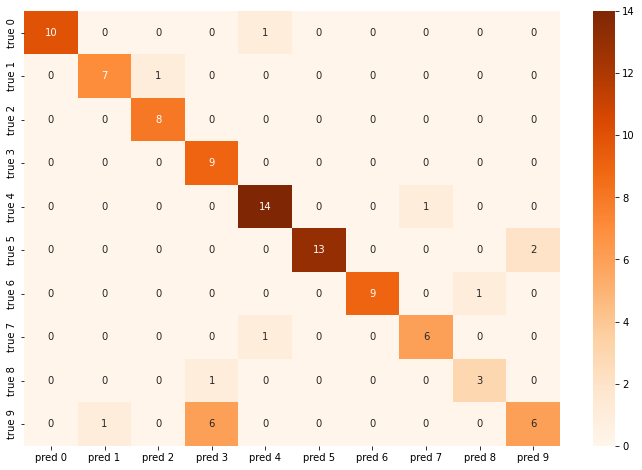

In [58]:
from string import ascii_uppercase
from pandas import DataFrame
import seaborn as sn
from sklearn.metrics import confusion_matrix

lines = ["true "+str(i) for i in range(10)]
columns = ["pred "+str(i) for i in range(10)]
conf_df = DataFrame(conf, index=lines, columns=columns)
plt.figure(figsize = (12,8))
ax = sn.heatmap(conf_df, cmap='Oranges', annot=True)